In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("squat_angle.csv")
data.head()

,Frame#,Time,Angle
0,1000,16.650,160.52260
1,1001,16.667,160.53308
2,1002,16.683,160.54486
3,1003,16.700,160.55446
4,1004,16.717,160.55936


<AxesSubplot:>

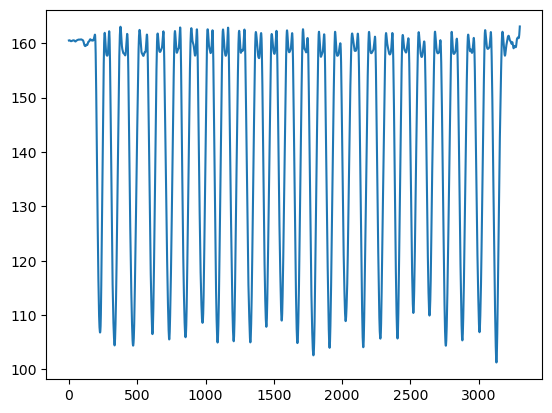

In [3]:
data['Angle'].plot()

In [4]:
import numpy as np

In [5]:
Fs = 60
varCount = 0        # 스쿼트 횟수 카운트
varHold = np.zeros(len(data['Angle']))
varDur = []
flag = np.zeros(len(data['Angle']))

Thres = 150         # 다리 각도 th

In [6]:
for i in range(len(data['Angle'])):
    if data['Angle'][i] < Thres:
        flag[i] = 1
    else:
        flag[i] = 0
    
    varHold[i] = varHold[i - 1] + flag[i]
    
    if varHold[i] == varHold[i - 1] and varHold[i] > 40:
        varCount += 1
        varDur.append(varHold[i])
        varHold[i] = 0

In [7]:
print("Given Data performed {0:d} times of Squat with correct posture".format(varCount))
averageDur = sum(varDur)/len(varDur)
print("Average posture duration is {0: .2f} sec".format(averageDur / Fs))

Given Data performed 25 times of Squat with correct posture
Average posture duration is  0.98 sec
